# Clustering Data with Machine Learning
Another common task in data analysis is clustering data into groups using automated algorithms. There are machine learning algorithms to iteratively collects points together and form clusters. These are generally classified as _unsupervised_ learning because there is no direct input (data or otherwise) from the user required.

To demonstrate, we will go through an example here. The point is to show how algorithms can learn features about data that we care about.

The [Scikit Learn](https://scikit-learn.org/stable/user_guide.html) is a toolkit we can use to quickly generate a few clusters of data in two dimensions and we demonstrate how to do that here:

(400, 2) (400,) (4, 2)


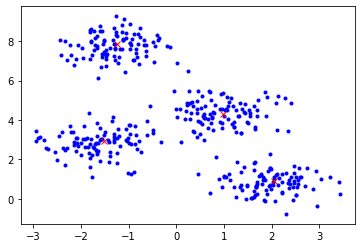

In [137]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import time
import IPython.display as ipydis
np.random.seed(2022)
npoints = 400
N = 4
x, cluster_labels, cluster_centers = make_blobs(n_samples=npoints, centers=N,
                       cluster_std=0.60, random_state=0,
                       return_centers=True)
print(x.shape,cluster_labels.shape,cluster_centers.shape)
plt.plot(x[:, 0], x[:, 1],'b.')
plt.plot(cluster_centers[:,0],cluster_centers[:,1],'rx')

Here `x` is an array of the data points, `cluster_labels` is an array which labels to which group each point belongs (0-3), `cluster_centers` is a list of the 4 cluster center points.


# K-means

_K-means_ is a straightforward method to understand that follows these steps:
1. Given a set of points $x$, randomly select $N$ center points, or centroids, $c$.
2. Calculate the distance of each point to each centroid.
3. Assign points the label $0$ to $(N-1)$ based on to which centroid they are closest.
4. Calculate new centroids based on the center of mass of each cluster of points.
5. Repeat Steps 2-4 until one of these occurs:
   - centroids no longer shift more than some defined distance, $\delta$
   - no points change their label
   - some predefined iteration max, $N_{iter}$, is reached


In [138]:
def initialize_centroids(x,N):
    x_indices = np.random.choice(np.arange(0,x.shape[0]),N)
    centroids = x[x_indices]
    return centroids

def get_new_centroids(x, labels, N):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([x[labels==k].mean(axis=0) for k in range(N)])

In [139]:
# distance is sqrt( (x - x')**2 + (y - y')**2 )
def assign_labels(x,c):
   # centroids are shape [N,2]
   # x are shape [npoints,2]
   # add middle index to centroids to properly broadcast in math operations
   c = c[:,np.newaxis,:] # [N,1,2]
   
   # calculate (x - x')**2 and (y - y')**2
   # x is shape [npoints,2], c is [N,1,2] results in an array of shape: [N,npoints,2]
   dist2 = (x - c)**2
   
   # calculate (x - x')**2 + (y - y')**2
   dist2 = dist2.sum(axis=2) # [N,npoints]
   
   # out of the N distances, return the index (0-(N-1)) of the one that is the minimum.
   label = np.argmin(dist2,axis=0) # [npoints]

   return label

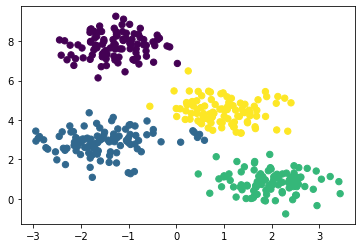

In [140]:
c = initialize_centroids(x,N)
l = assign_labels(x,c)
plt.scatter(x[:, 0], x[:, 1], c=l, s=40, cmap='viridis')

In [141]:
centroids.shape

(4, 2)

# Homework
Follow the example from the previous notebook [Linear Regression using SGD](./01_linear_regression_sgd.ipynb) and build a loop that properly finds the centers of these 4 clusters using k-means.

In [142]:
   
def updated_cs(centroids, x, last_labels, N, cluster_labels, learning_rate = 1e-4):
    dL_dc = []
    for c, centroid in enumerate(centroids):
        dc = []
        for dim in range(centroids.shape[1]):
            err = cluster_labels-labels
            err[err!=0] = -1
            dL_dc_dim = -2 * centroid[dim] * (err)
            dL_dc_dim = np.mean(dL_dc_dim) 
            dc += [dL_dc_dim]
        dL_dc += [dc]
    dL_dc = np.array(dL_dc)
    return centroids - learning_rate * dL_dc

    

accuracy:  0.4475


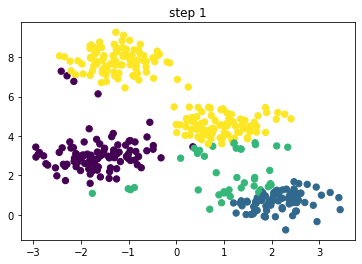

accuracy:  0.4725


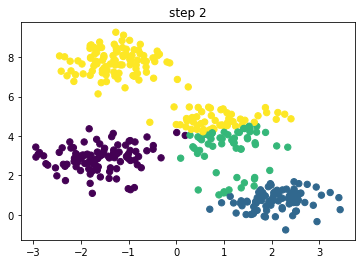

accuracy:  0.495


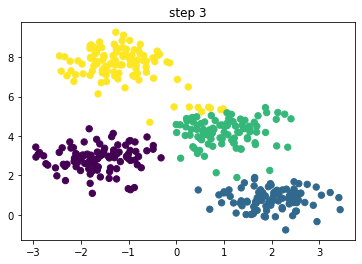

accuracy:  0.5025


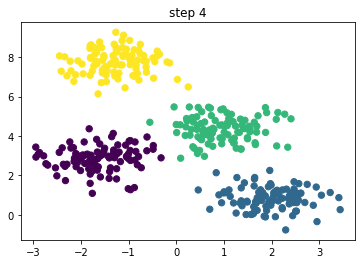

point labels unchanged as of step 5
accuracy:  0.9975


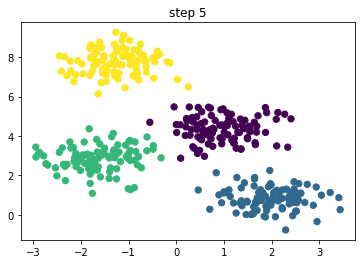

centroids unchanged as of step 6
accuracy:  0.9975


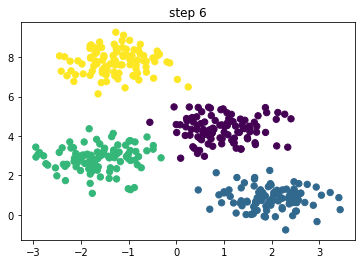

centroids unchanged as of step 7
accuracy:  0.9975


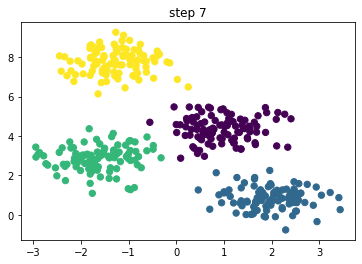

centroids unchanged as of step 8
accuracy:  0.9975


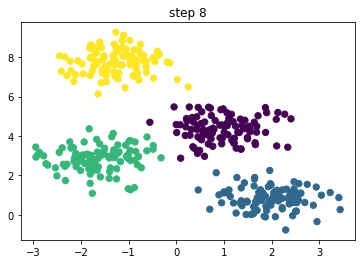

centroids unchanged as of step 9
accuracy:  0.9975


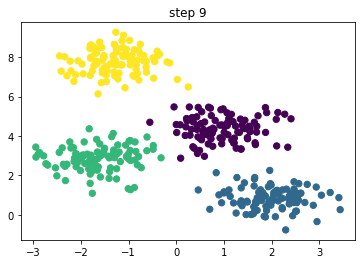

centroids unchanged as of step 10
accuracy:  0.9975


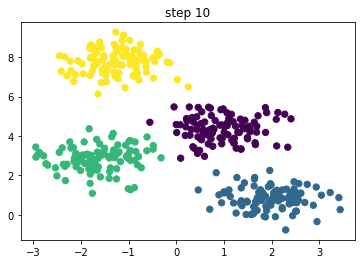

centroids unchanged as of step 11
accuracy:  0.9975


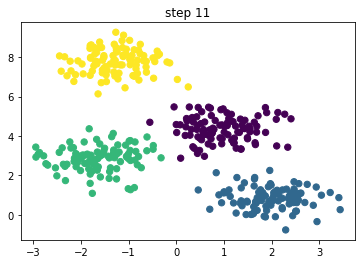

centroids unchanged as of step 12
accuracy:  0.9975


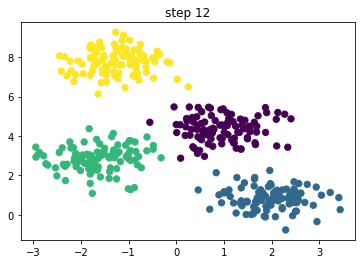

centroids unchanged as of step 13
accuracy:  0.9975


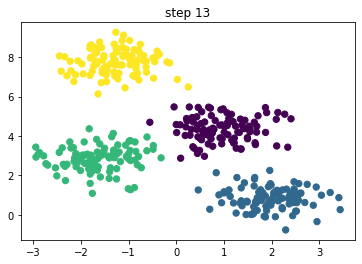

centroids unchanged as of step 14
accuracy:  0.9975


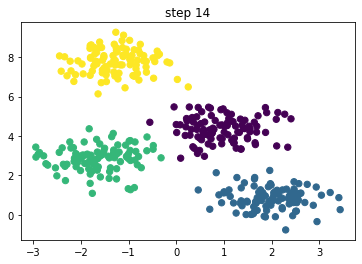

centroids unchanged as of step 15
accuracy:  0.9975


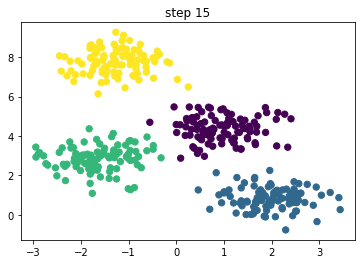

centroids unchanged as of step 16
accuracy:  0.9975


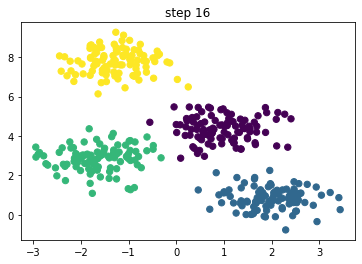

centroids unchanged as of step 17
accuracy:  0.9975


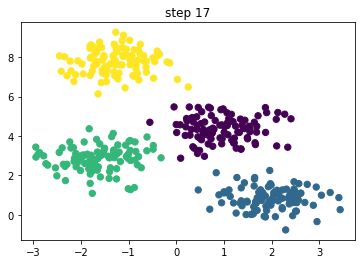

centroids unchanged as of step 18
accuracy:  0.9975


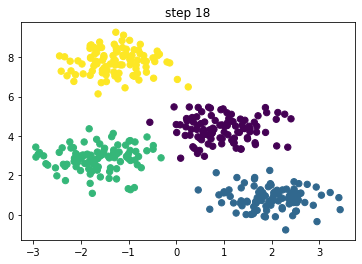

centroids unchanged as of step 19
accuracy:  0.9975


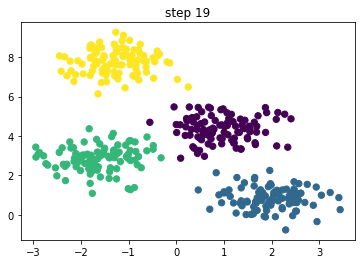

centroids unchanged as of step 20
accuracy:  0.9975


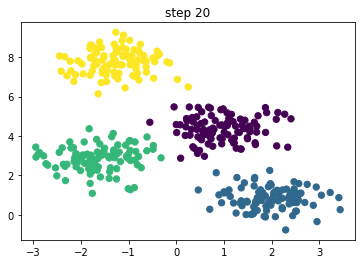

centroids unchanged as of step 21
accuracy:  0.9975


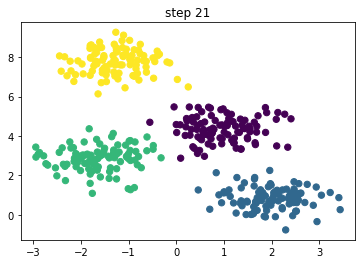

centroids unchanged as of step 22
accuracy:  0.9975


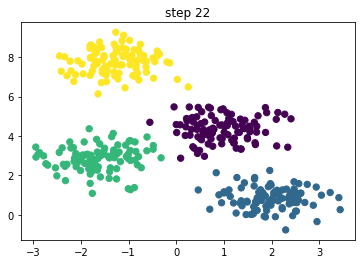

centroids unchanged as of step 23
accuracy:  0.9975


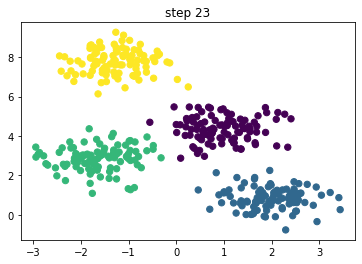

centroids unchanged as of step 24
accuracy:  0.9975


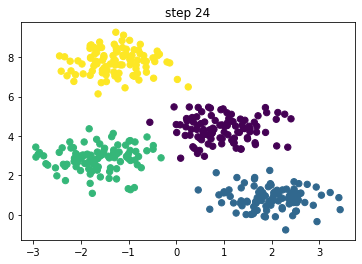

centroids unchanged as of step 25
accuracy:  0.9975


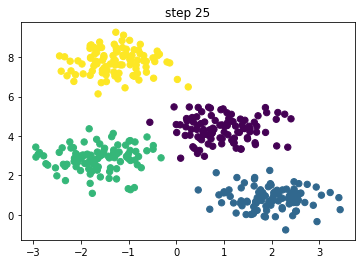

centroids unchanged as of step 26
accuracy:  0.9975


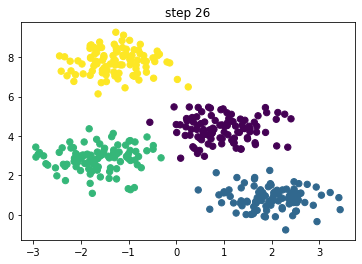

centroids unchanged as of step 27
accuracy:  0.9975


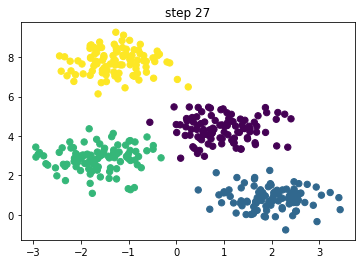

centroids unchanged as of step 28
accuracy:  0.9975


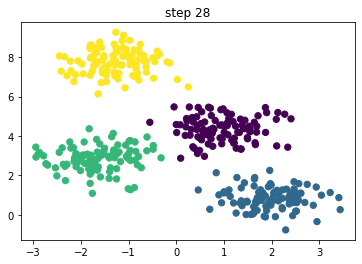

centroids unchanged as of step 29
accuracy:  0.9975


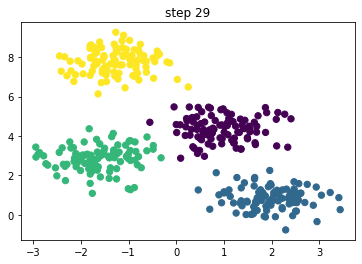

centroids unchanged as of step 30
accuracy:  0.9975


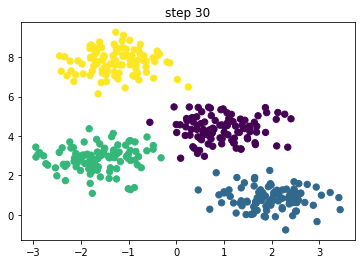

In [143]:
# set our initial slope and intercept
delta = 0.01
last_centroids = initialize_centroids(x,N)
last_labels = assign_labels(x,last_centroids)
step = 0

plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
plt.title('step %d' % -1)
plt.show()
time.sleep(1)
ipydis.clear_output(wait=True)

# batch_size = 60
# # set a learning rate for each parameter
learning_rate = 1e-4
# learning_rate_y = 1e-4
# # use these to plot our progress over time
loss_history = []

# we run our loop N times
loop_N = 30
    
for run in range(loop_N):
    centroids = get_new_centroids(x,last_labels,N)
    centroids = updated_cs(centroids, x, last_labels, N, cluster_labels, learning_rate)
    labels = assign_labels(x,centroids)
    step+=1

    # test if centroids have stopped moving
    if np.all((last_centroids - centroids) < delta):
        print('centroids unchanged as of step %d' % step)
        learning_rate = learning_rate*1.2
    elif np.all(labels == last_labels):
        print('point labels unchanged as of step %d' % step)
        cross = pd.DataFrame([labels,cluster_labels]).T.value_counts()
        reLabels = []
        for cL in range(centroids.shape[0]):
            reLabels += [cross[cL].index[np.where(cross[cL]==max(cross[cL]))[0][0]]]
        if len(reLabels) == len(np.unique(reLabels)):
            if reLabels == list(range(centroids.shape[0])):
                1
                #break
            else:
                centroids = centroids[np.array(reLabels),:]
                labels = assign_labels(x,centroids)
                last_labels = labels
                last_centroids = centroids
    else:
        last_labels = labels
        last_centroids = centroids
        learning_rate = learning_rate*0.99


    # we can use the "truth" labels, cluster_labels to see how well we are doing
    # accuracy: # of points correctly labeled / total number of points
    accuracy = np.sum((cluster_labels == labels).astype(int)) / cluster_labels.shape[0]
    loss_history += [accuracy]
    print('accuracy: ',accuracy)
    plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
    plt.title('step %d' % step)
    plt.show()
